# Time Series Analysis statsmodels Lecture Notes

## Read macrodata.csv

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('macrodata.csv',index_col=0,parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


## Plot realgdp

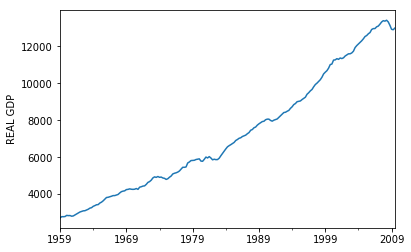

In [2]:
ax = df['realgdp'].plot();
ax.autoscale(axis='x',tight=True);
ax.set(ylabel='REAL GDP');

## Get the cycle component

In [3]:
from statsmodels.tsa.filters.hp_filter import hpfilter

### Unpack the tuple

In [4]:
gdp_cycle , gdp_trend = hpfilter(df['realgdp'],lamb=1600)

In [5]:
df['GDP CYCLE'] = gdp_cycle

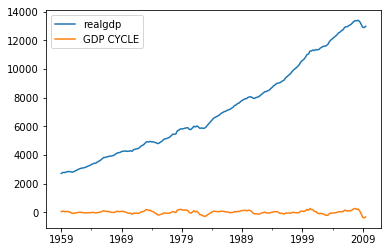

In [6]:
df[['realgdp','GDP CYCLE']].plot()

## Extract the trend component and plot it

In [7]:
df['GDP TREND'] = gdp_trend

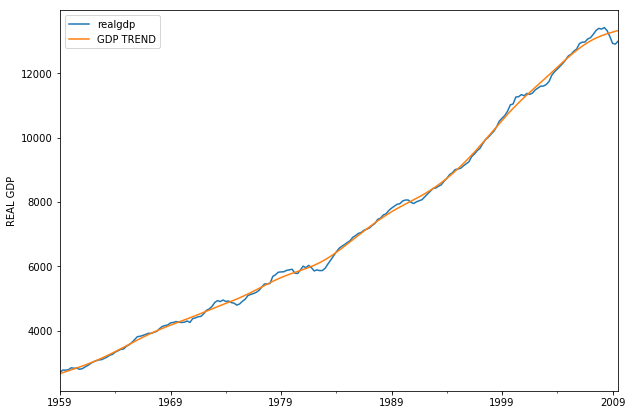

In [8]:
ax = df[['realgdp','GDP TREND']].plot(figsize=(10,7));
ax.set(ylabel='REAL GDP');
ax.autoscale(axis='x',tight=True);

## Slice the above plot from 31 March 2000 onwards

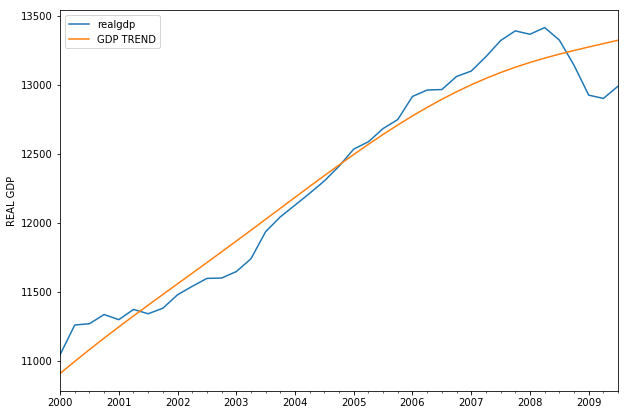

In [9]:
ax = df[['realgdp','GDP TREND']]['2000-03-31':].plot(figsize=(10,7));
ax.set(ylabel='REAL GDP');
ax.autoscale(axis='x',tight=True);

# ETS Decomposition

## Read airline_passengers.csv and check if any empty values

In [10]:
df = pd.read_csv('airline_passengers.csv',index_col=0,parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Check for empty values

In [11]:
df['Thousands of Passengers'].isnull().sum()

0

## Plot our timeseries

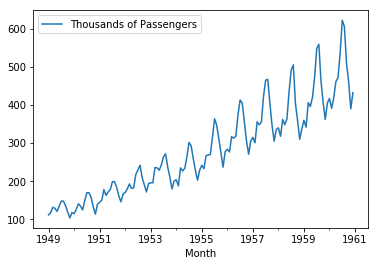

In [12]:
df.plot();

## Apply ETS Decomposition

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
result = seasonal_decompose(df['Thousands of Passengers'],model='multiplicative')

## Access the trend and seasonal and residual components

In [16]:
result.trend

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
1950-04-01    136.416667
1950-05-01    137.416667
1950-06-01    138.750000
1950-07-01    140.916667
1950-08-01    143.166667
1950-09-01    145.708333
1950-10-01    148.416667
1950-11-01    151.541667
1950-12-01    154.708333
1951-01-01    157.125000
1951-02-01    159.541667
1951-03-01    161.833333
1951-04-01    164.125000
1951-05-01    166.666667
1951-06-01    169.083333
                 ...    
1958-07-01    381.833333
1958-08-01    383.666667
1958-09-01    386.500000
1958-10-01    390.333333
1958-11-01    394.708333
1958-12-01    398.625000
1959-01-01    402.541667
1959-02-01    407.166667
1959-03-01    411.8

In [17]:
result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
1950-01-01    0.910230
1950-02-01    0.883625
1950-03-01    1.007366
1950-04-01    0.975906
1950-05-01    0.981378
1950-06-01    1.112776
1950-07-01    1.226556
1950-08-01    1.219911
1950-09-01    1.060492
1950-10-01    0.921757
1950-11-01    0.801178
1950-12-01    0.898824
1951-01-01    0.910230
1951-02-01    0.883625
1951-03-01    1.007366
1951-04-01    0.975906
1951-05-01    0.981378
1951-06-01    1.112776
                ...   
1958-07-01    1.226556
1958-08-01    1.219911
1958-09-01    1.060492
1958-10-01    0.921757
1958-11-01    0.801178
1958-12-01    0.898824
1959-01-01    0.910230
1959-02-01    0.883625
1959-03-01    1.007366
1959-04-01    0.975906
1959-05-01    0.981378
1959-06-01    1.112776
1959-

In [18]:
result.resid

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
1949-11-01    1.006270
1949-12-01    1.011812
1950-01-01    0.962603
1950-02-01    1.071467
1950-03-01    1.037447
1950-04-01    1.014048
1950-05-01    0.926903
1950-06-01    0.965041
1950-07-01    0.983557
1950-08-01    0.973372
1950-09-01    1.022505
1950-10-01    0.972193
1950-11-01    0.938953
1950-12-01    1.006791
1951-01-01    1.013845
1951-02-01    1.064018
1951-03-01    1.091854
1951-04-01    1.017665
1951-05-01    1.051583
1951-06-01    0.946044
                ...   
1958-07-01    1.048384
1958-08-01    1.078970
1958-09-01    0.985654
1958-10-01    0.997797
1958-11-01    0.980294
1958-12-01    0.940569
1959-01-01    0.982518
1959-02-01    0.950574
1959-03-01    0.978528
1959-04-01    0.974644
1959-05-01    1.017764
1959-06-01    0.996861
1959-

## Plot our results and modify the figure size. Note because 'result' is a DecomposeObject it automatcially creates a subplot but we cannot modify the figure size of the subplot as we would normally. If we want the conventional method we must specify what attribute of the object we want to plot. Otherwise import pylab

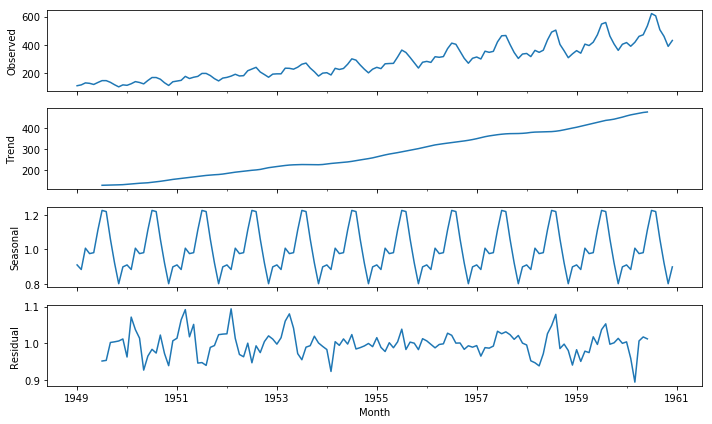

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

result.plot();

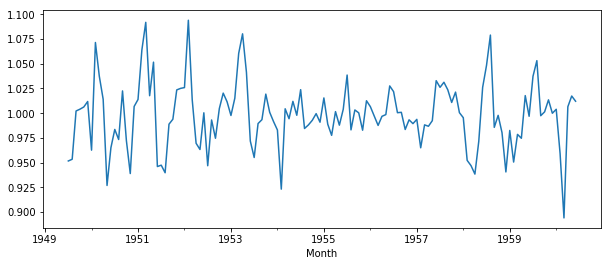

In [20]:
result.resid.plot(figsize=(10,4))

# EWMA

## Read the airline_passengers.csv file

In [21]:
df = pd.read_csv('airline_passengers.csv',index_col=0,parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [22]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

## Apply a SMA for 6 month and 12 month period and plot it

In [23]:
df['6-Month Period'] = df['Thousands of Passengers'].rolling(window=6).mean()
df['12-Month Period'] = df['Thousands of Passengers'].rolling(window=12).mean()

In [24]:
df.head(12)

,Thousands of Passengers,6-Month Period,12-Month Period
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


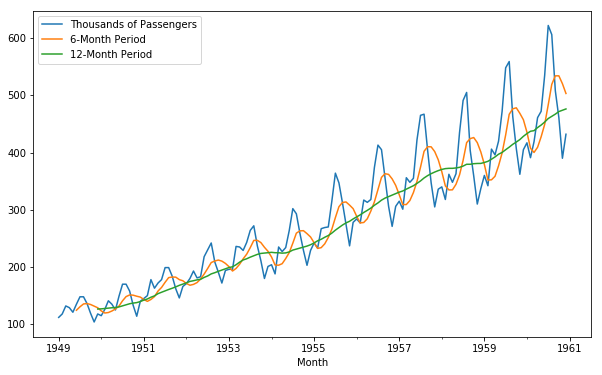

In [25]:
df.plot(figsize=(10,6))

## Apply EWMA with a span of 12 and plot it against raw data

In [26]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

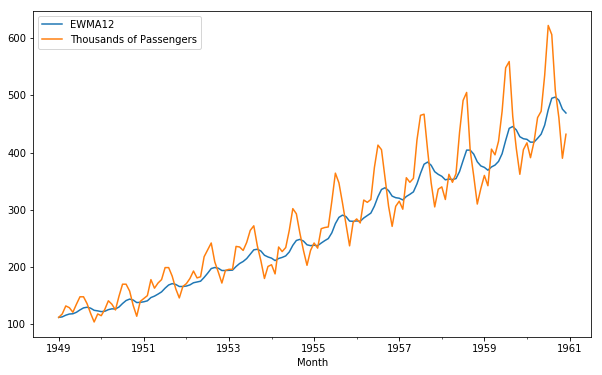

In [27]:
df[['EWMA12','Thousands of Passengers']].plot(figsize=(10,6));

## Plot Raw Data vs EWMA (span=12) and SMA(window=12). Technically EWMA and SMA use the same window size but observe how much better EWMA is in capturing the seasonalities

In [28]:
df.head()

,Thousands of Passengers,6-Month Period,12-Month Period,EWMA12
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,112.923077
1949-03-01,132,NaN,NaN,115.857988
1949-04-01,129,NaN,NaN,117.879836
1949-05-01,121,NaN,NaN,118.359861


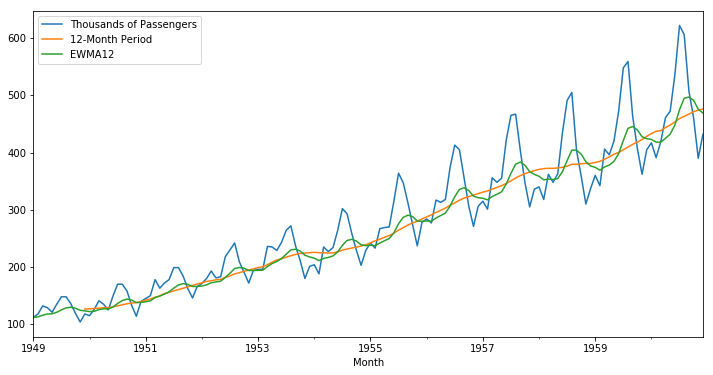

In [29]:
df[['Thousands of Passengers','12-Month Period','EWMA12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

# Holt Winters method

## Read airline passengers csv and parse dates

In [30]:
df = pd.read_csv('airline_passengers.csv',index_col=0,parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Check the index and make the frequency appropriately

In [31]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [32]:
df.index.freq = 'MS' #'MS' is for month start

In [33]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

## Apply Simple exponential smoothing with statsmodels. Note that SES is exactly the same as EWMA. Use a span of 12

In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(1+span)

df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues
df['SES12']=df['SES12'].shift(-1)
df.head()

,Thousands of Passengers,SES12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


## Implement a Double Exponential Smoothing (DES) using statsmodels with additive trend model

In [35]:
df.head()

,Thousands of Passengers,SES12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [36]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.holtwinters import ExponentialSmoothing

model=ExponentialSmoothing(df['Thousands of Passengers'],trend='add')
FitModel = model.fit()
df['DES12']= FitModel.fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,SES12,DES12
Month,,,
1949-01-01,112,112.000000,114.336774
1949-02-01,118,112.923077,120.336774
1949-03-01,132,115.857988,134.336774
1949-04-01,129,117.879836,131.336774
1949-05-01,121,118.359861,123.336774


## Plot the data of the first 2 years for Real data, SES and DES

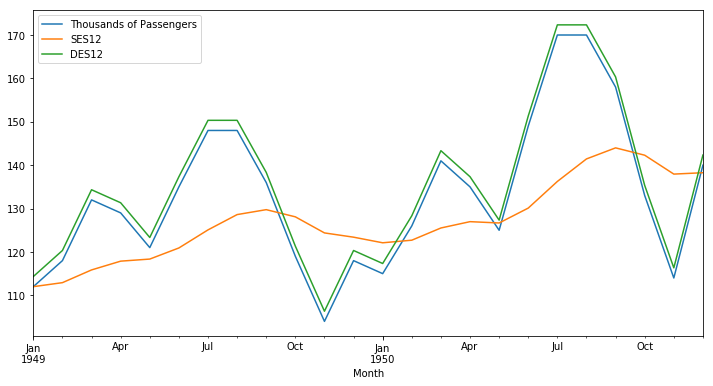

In [37]:
df[['Thousands of Passengers','SES12','DES12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True)

## Create a multiplicative DES model of the above

In [38]:
df.head()

,Thousands of Passengers,SES12,DES12
Month,,,
1949-01-01,112,112.000000,114.336774
1949-02-01,118,112.923077,120.336774
1949-03-01,132,115.857988,134.336774
1949-04-01,129,117.879836,131.336774
1949-05-01,121,118.359861,123.336774


In [39]:
model=ExponentialSmoothing(df['Thousands of Passengers'],trend='mul')
FitModel=model.fit()
df['DESmul12'] = FitModel.fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,SES12,DES12,DESmul12
Month,,,,
1949-01-01,112,112.000000,114.336774,112.049247
1949-02-01,118,112.923077,120.336774,118.051885
1949-03-01,132,115.857988,134.336774,132.058041
1949-04-01,129,117.879836,131.336774,129.056722
1949-05-01,121,118.359861,123.336774,121.053204


## Plot Real, DESADD, DESMUL on the same plot for the first two years

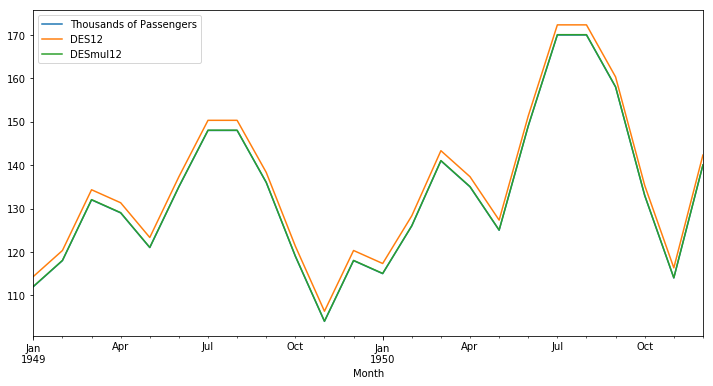

In [40]:
df[['Thousands of Passengers','DES12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Apply Triple Exponential Smoothing with additive trend, seasonality and 12 seasonal periods

In [41]:
df.head()

,Thousands of Passengers,SES12,DES12,DESmul12
Month,,,,
1949-01-01,112,112.000000,114.336774,112.049247
1949-02-01,118,112.923077,120.336774,118.051885
1949-03-01,132,115.857988,134.336774,132.058041
1949-04-01,129,117.879836,131.336774,129.056722
1949-05-01,121,118.359861,123.336774,121.053204


In [42]:
model= ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12)
FitModel = model.fit()
df['TESadd12'] = FitModel.fittedvalues
df.head()

,Thousands of Passengers,SES12,DES12,DESmul12,TESadd12
Month,,,,,
1949-01-01,112,112.000000,114.336774,112.049247,113.081280
1949-02-01,118,112.923077,120.336774,118.051885,120.550730
1949-03-01,132,115.857988,134.336774,132.058041,135.527373
1949-04-01,129,117.879836,131.336774,129.056722,133.155127
1949-05-01,121,118.359861,123.336774,121.053204,125.656203


## Repeat TES12 with multiplicative mode

In [43]:
model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12)
FitModel = model.fit()
df['TES12mul12'] = FitModel.fittedvalues
df.head()

,Thousands of Passengers,SES12,DES12,DESmul12,TESadd12,TES12mul12
Month,,,,,,
1949-01-01,112,112.000000,114.336774,112.049247,113.081280,111.753654
1949-02-01,118,112.923077,120.336774,118.051885,120.550730,118.993207
1949-03-01,132,115.857988,134.336774,132.058041,135.527373,133.458671
1949-04-01,129,117.879836,131.336774,129.056722,133.155127,127.957617
1949-05-01,121,118.359861,123.336774,121.053204,125.656203,121.027379


## Plot the TES12add, TES12mul and Real data for the entire dataset

In [44]:
df.head()

,Thousands of Passengers,SES12,DES12,DESmul12,TESadd12,TES12mul12
Month,,,,,,
1949-01-01,112,112.000000,114.336774,112.049247,113.081280,111.753654
1949-02-01,118,112.923077,120.336774,118.051885,120.550730,118.993207
1949-03-01,132,115.857988,134.336774,132.058041,135.527373,133.458671
1949-04-01,129,117.879836,131.336774,129.056722,133.155127,127.957617
1949-05-01,121,118.359861,123.336774,121.053204,125.656203,121.027379


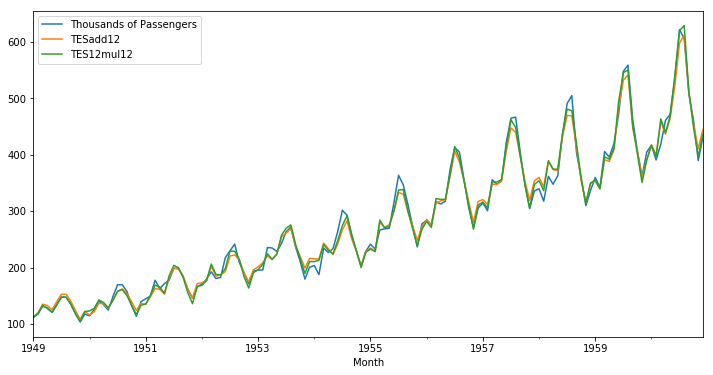

In [45]:
df[['Thousands of Passengers','TESadd12','TES12mul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

## Check the variations of the two schemes within the 2 first years of the dataset

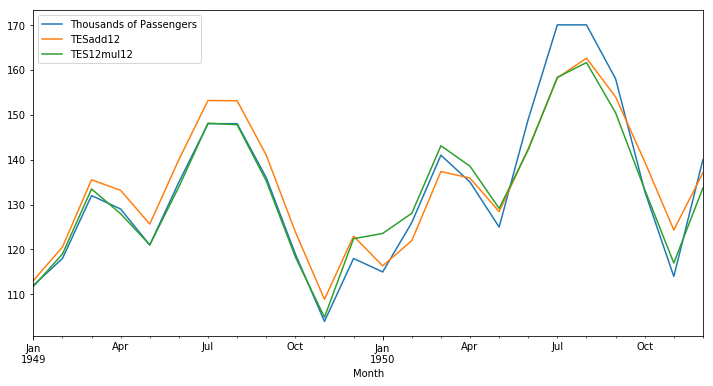

In [46]:
df[['Thousands of Passengers','TESadd12','TES12mul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);